# Travel Insurance Analysis Report

This Jupyter Notebook aims to support the data cleaning, exploration, analysis and visualisation of the _travel_insurance.csv_ dataset in order to support the weekly newsletter for boat owners. This newsletter helps sellers to get more views on their boats and understand in more depth the market trends.

## 1. Importing Data

### 1.1 Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Importing Raw Data

In [2]:
users_data = pd.read_csv('data/travel_insurance.csv')
users_data.head(10)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0


### 1.3. Visual Inspection of Data

In [3]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 108.7+ KB


In [4]:
users_data.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

## 2. Data Manipulation

In this section new columns will be created for a more convenient plotting of categories using Seaborn.

In [5]:
def create_col(col_name, new_col_name, cond, cont_cond, fil_col, fil_col_cont):
    users_data.loc[users_data[col_name] == cond, new_col_name] = fil_col
    users_data.loc[users_data[col_name] == cont_cond, new_col_name] = fil_col_cont
    return users_data

In [6]:
users_data = create_col(col_name='TravelInsurance', new_col_name='is_customer',
                        cond=1, cont_cond=0, fil_col='Customers', fil_col_cont='Not Customers')

users_data = create_col(col_name='ChronicDiseases', new_col_name='is_chronic',
                        cond=1, cont_cond=0, fil_col='Chronically Ill', fil_col_cont='Healthy')

users_data = create_col(col_name='GraduateOrNot', new_col_name='is_grad',
                        cond='Yes', cont_cond='No', fil_col='Graduates', fil_col_cont='Not Graduates')

users_data = create_col(col_name='FrequentFlyer', new_col_name='is_freq',
                        cond='Yes', cont_cond='No', fil_col='Frequent', fil_col_cont='Not Frequent')

users_data.head(10)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,is_customer,is_chronic,is_grad,is_freq
0,31,Government Sector,Yes,400000,6,1,No,No,0,Not Customers,Chronically Ill,Graduates,Not Frequent
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Not Customers,Healthy,Graduates,Not Frequent
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,Customers,Chronically Ill,Graduates,Not Frequent
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,Not Customers,Chronically Ill,Graduates,Not Frequent
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,Not Customers,Chronically Ill,Graduates,Frequent
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0,Not Customers,Healthy,Not Graduates,Not Frequent
6,31,Government Sector,Yes,1300000,4,0,No,No,0,Not Customers,Healthy,Graduates,Not Frequent
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1,Customers,Healthy,Graduates,Frequent
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1,Customers,Chronically Ill,Graduates,Frequent
9,33,Government Sector,Yes,800000,3,0,Yes,No,0,Not Customers,Healthy,Graduates,Frequent


In [32]:
def plot_std(tot_dat, typ, x_col, tit, xlab, ylab, y_col=None, hues=None, log_sel=False, alph_tot=None, alph_100=None, sec_data=None):
    '''
    This function takes as input one or two DataFrames and the desired columns to be plotted as well as the type of plot to display the data.
    '''
    fig1 = plt.figure(figsize=(9,6))

    ax = plt.gca()

    #sel_color = '#4495a2'
    sel_color = '#7ca655'
    sel_frame = 'dimgrey'
    sel_total = 'dimgrey'
    #sel_total = '#7ca655'

    if typ == 's':
        sns.scatterplot(data=tot_dat, x=x_col, y=y_col, color=sel_total, alpha=alph_tot)
    elif typ == 'v':
        sns.violinplot(x=x_col, y=y_col, data=tot_dat, palette=[sel_color, sel_total])
    elif typ == 'b':
        sns.barplot(data = avg_ing, x = x_col, y = y_col, hue=hues, palette=[sel_color, sel_total])
    elif typ == 'c':
        sns.set_style("whitegrid")
        if hues != None:
            sns.countplot(x = x_col, data = tot_dat, hue = hues, palette=[sel_total, sel_color])
        else:
            sns.countplot(x = x_col, data = tot_dat, color=sel_total)

    plt.title(tit, color=sel_frame, fontweight="bold", fontsize=16)
    plt.xlabel(xlab, color=sel_frame, fontweight="bold", fontsize=16)
    plt.ylabel(ylab, color=sel_frame, fontweight="bold", fontsize=16)


    if not (typ == 'c' and hues == None):
        plt.legend(fontsize=14)

    if log_sel == True:
        ax.set_yscale('log')
        ax.set_xscale('log')

    ax.tick_params(color=sel_frame, labelcolor=sel_frame)

    for spine in ax.spines.values():
        spine.set_edgecolor(sel_frame)

    fig1.tight_layout()

## 3. Data Visualisation

In this section data is visualised to answer the questions:
- Are there any differences in the travel habits between customers and non-customers?
- Are frequent travellers more likely to get our insurance and travel abroad?
- Any other relevant insight.

### 3.1. Age

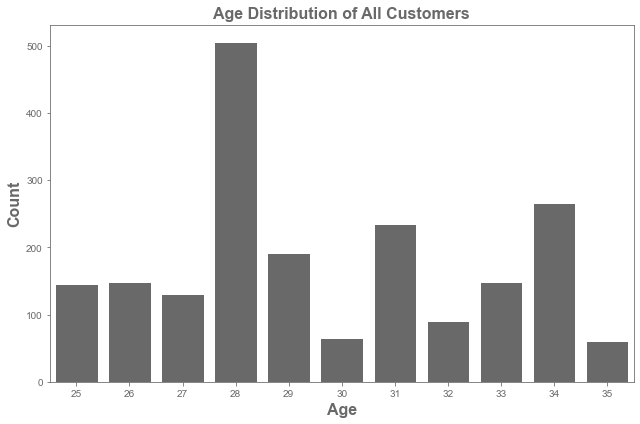

In [8]:
plot_std(tot_dat=users_data, typ='c', x_col='Age',
            tit='Age Distribution of All Customers', xlab='Age', ylab='Count')
plt.savefig('images/3.1.1.png')

In [9]:
per_custom = users_data['TravelInsurance'].sum()/len(users_data['TravelInsurance'])*100
print('Percentage of Travellers that are Customers {}%.'.format(round(per_custom,2)))

Percentage of Travellers that are Customers 35.73%.


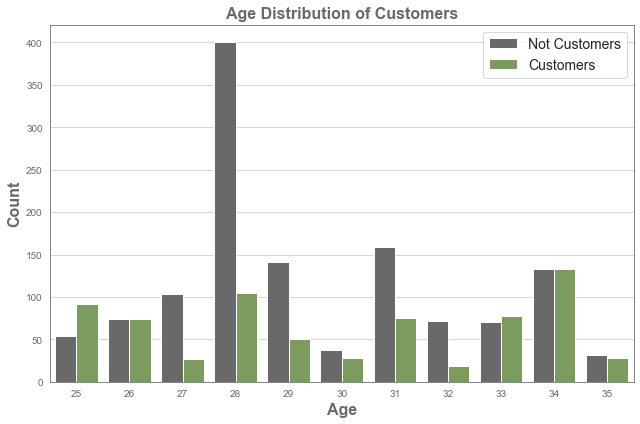

In [10]:
plot_std(tot_dat=users_data, typ='c', x_col='Age', hues='is_customer',
            tit='Age Distribution of Customers', xlab='Age', ylab='Count')
plt.savefig('images/3.1.2.png')

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

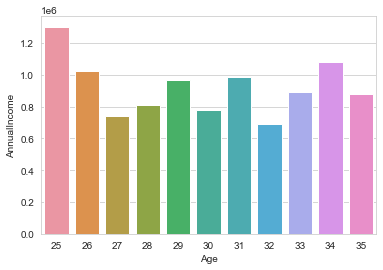

In [11]:
avg_ing = users_data.groupby(['Age'])['AnnualIncome'].mean().reset_index()
sns.barplot(data = avg_ing, x = 'Age', y = 'AnnualIncome')

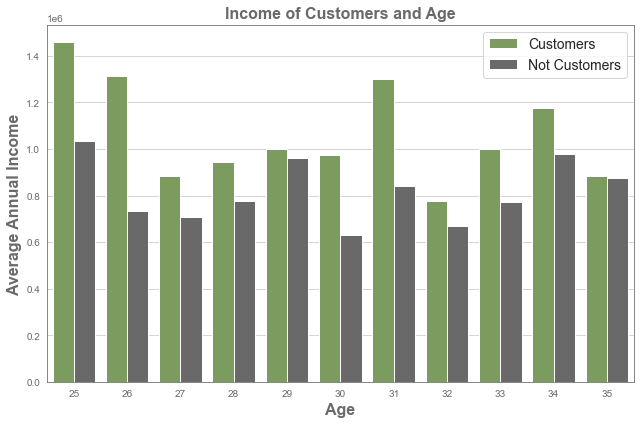

In [12]:
avg_ing = users_data.groupby(['Age','is_customer'])['AnnualIncome'].mean().reset_index()

plot_std(tot_dat=avg_ing, typ='b', x_col='Age', y_col='AnnualIncome', hues='is_customer',
            tit='Income of Customers and Age', xlab='Age', ylab='Average Annual Income')
plt.savefig('images/3.1.3.png')

In [13]:
inc_cust= avg_ing[avg_ing['is_customer']=='Customers']['AnnualIncome'].reset_index()
inc_notCust = avg_ing[avg_ing['is_customer']=='Not Customers']['AnnualIncome'].reset_index()

ages = avg_ing['Age'].unique()
diff_inc = inc_cust['AnnualIncome']-inc_notCust['AnnualIncome']

print('The mean of Customers Annual Income is: '+str(inc_cust['AnnualIncome'].mean()))
print('The mean of Not Customers Annual Income is: '+str(inc_notCust['AnnualIncome'].mean()))

The mean of Customers Annual Income is: 1065309.9036237414
The mean of Not Customers Annual Income is: 816824.4909719662


### 3.2. Graduates

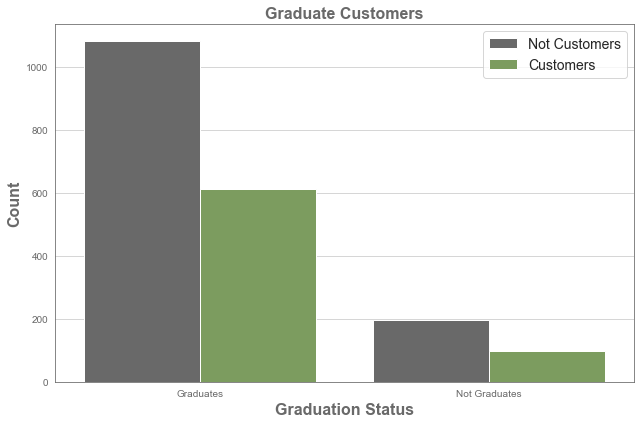

In [14]:
plot_std(tot_dat=users_data, typ='c', x_col='is_grad', hues='is_customer',
            tit='Graduate Customers', xlab='Graduation Status', ylab='Count')
plt.savefig('images/3.2.1.png')

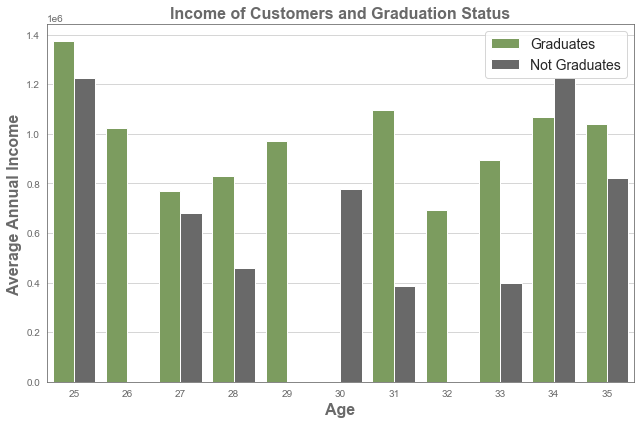

In [15]:
avg_ing = users_data.groupby(['Age','is_grad'])['AnnualIncome'].mean().reset_index()
plot_std(tot_dat=avg_ing, typ='b', x_col='Age', y_col='AnnualIncome', hues='is_grad',
            tit='Income of Customers and Graduation Status', xlab='Age', ylab='Average Annual Income')
plt.savefig('images/3.2.2.png')

In [16]:
inc_cust_grad = avg_ing[avg_ing['is_grad']=='Graduates']['AnnualIncome'].reset_index()
inc_notCust_grad = avg_ing[avg_ing['is_grad']=='Not Graduates']['AnnualIncome'].reset_index()

ages = avg_ing['Age'].unique()
diff_inc = inc_cust_grad['AnnualIncome'].mean()-inc_notCust_grad['AnnualIncome'].mean()

print('The mean of Graduates Annual Income is: '+str(inc_cust_grad['AnnualIncome'].mean()))
print('The mean of Not Graduates Annual Income is: '+str(inc_notCust_grad['AnnualIncome'].mean()))

The mean of Graduates Annual Income is: 975261.6973989637
The mean of Not Graduates Annual Income is: 747248.4562006621


### 3.3. Employment Type

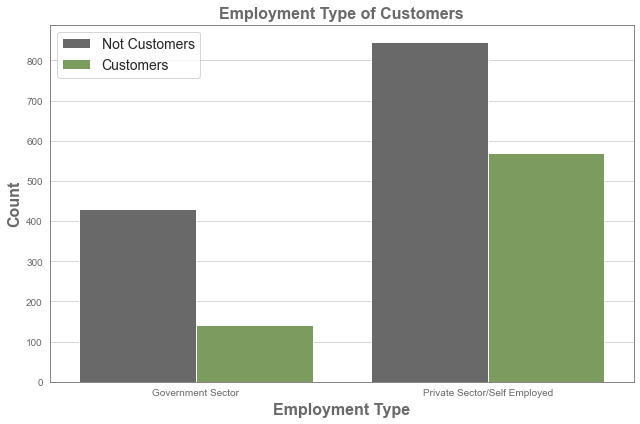

In [17]:
plot_std(tot_dat=users_data, typ='c', x_col='Employment Type', hues='is_customer',
            tit='Employment Type of Customers', xlab='Employment Type', ylab='Count')
plt.savefig('images/3.3.1.png')

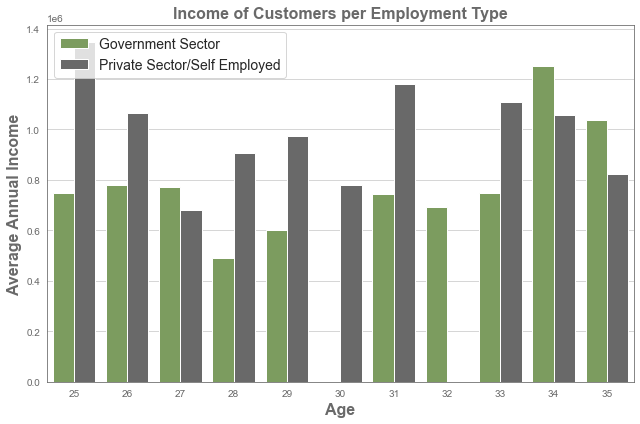

In [18]:
avg_ing = users_data.groupby(['Age','Employment Type'])['AnnualIncome'].mean().reset_index()
plot_std(tot_dat=avg_ing, typ='b', x_col='Age', y_col='AnnualIncome', hues='Employment Type',
            tit='Income of Customers per Employment Type', xlab='Age', ylab='Average Annual Income')
plt.savefig('images/3.3.2.png')

### 3.4. Chronic Illnesses

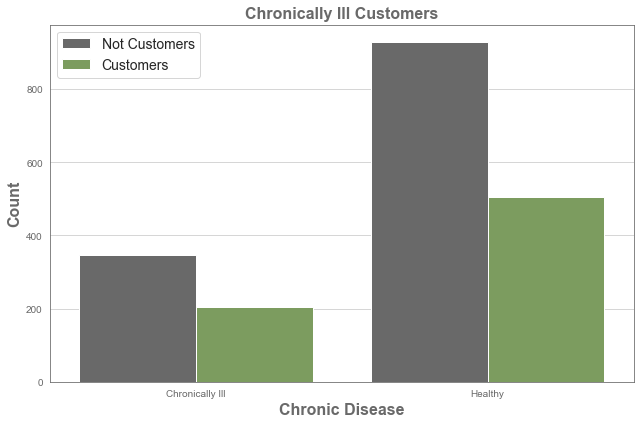

In [19]:
plot_std(tot_dat=users_data, typ='c', x_col='is_chronic', hues='is_customer',
            tit='Chronically Ill Customers', xlab='Chronic Disease', ylab='Count')
plt.savefig('images/3.4.1.png')

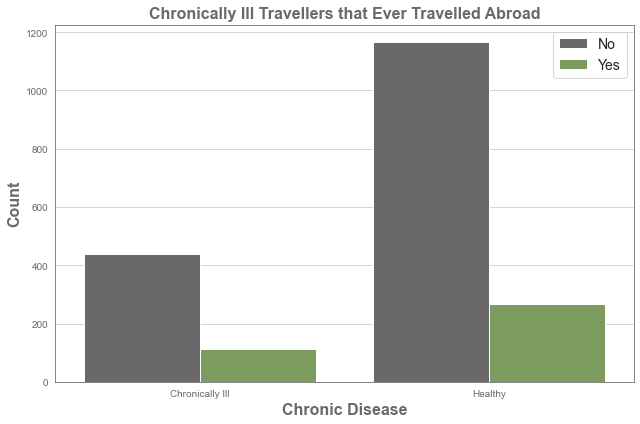

In [20]:
plot_std(tot_dat=users_data, typ='c', x_col='is_chronic', hues='EverTravelledAbroad',
            tit='Chronically Ill Travellers that Ever Travelled Abroad', xlab='Chronic Disease', ylab='Count')
plt.savefig('images/3.4.2.png')

### 3.5. Family Members

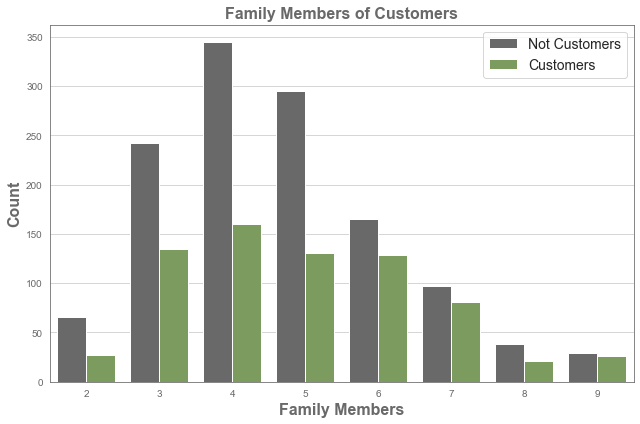

In [21]:
plot_std(tot_dat=users_data, typ='c', x_col='FamilyMembers', hues='is_customer',
            tit='Family Members of Customers', xlab='Family Members', ylab='Count')
plt.savefig('images/3.5.1.png')

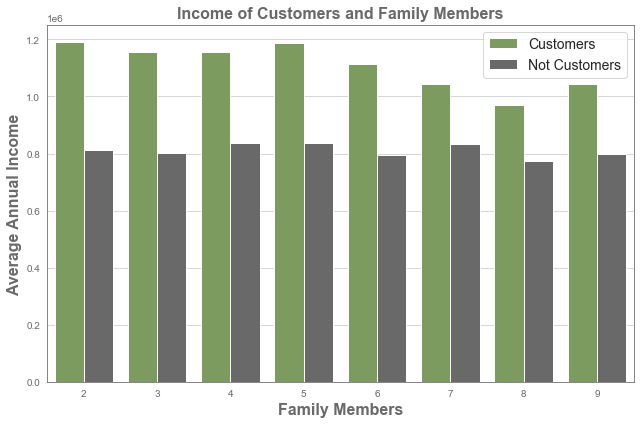

In [22]:
avg_ing = users_data.groupby(['FamilyMembers','is_customer'])['AnnualIncome'].mean().reset_index()
plot_std(tot_dat=avg_ing, typ='b', x_col='FamilyMembers', y_col='AnnualIncome', hues='is_customer',
            tit='Income of Customers and Family Members', xlab='Family Members', ylab='Average Annual Income')
plt.savefig('images/3.5.2.png')

In [23]:
inc_cust_memb = avg_ing[avg_ing['is_customer']=='Customers']['AnnualIncome'].reset_index()
inc_notCust_memb = avg_ing[avg_ing['is_customer']=='Not Customers']['AnnualIncome'].reset_index()

membs = avg_ing['FamilyMembers'].unique()
diff_inc = inc_cust_memb['AnnualIncome'].mean()-inc_notCust_memb['AnnualIncome'].mean()

print('The mean of Graduates Annual Income is: '+str(inc_cust_memb['AnnualIncome'].mean()))
print('The mean of Not Graduates Annual Income is: '+str(inc_notCust_memb['AnnualIncome'].mean()))

The mean of Graduates Annual Income is: 1107966.7468513194
The mean of Not Graduates Annual Income is: 811633.5860810999


### 3.6. Frequent Flyers

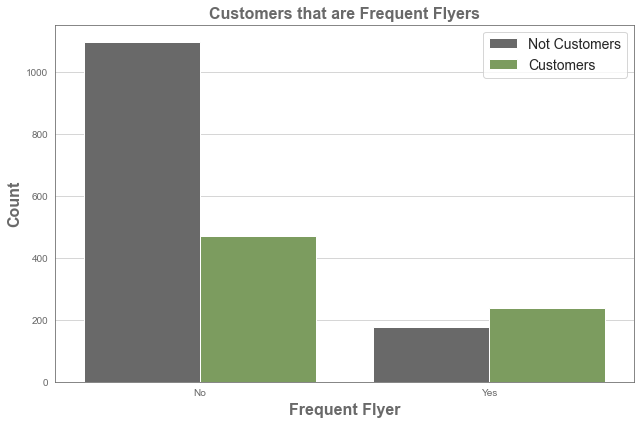

In [24]:
plot_std(tot_dat=users_data, typ='c', x_col='FrequentFlyer', hues='is_customer',
            tit='Customers that are Frequent Flyers', xlab='Frequent Flyer', ylab='Count')
plt.savefig('images/3.6.1.png')

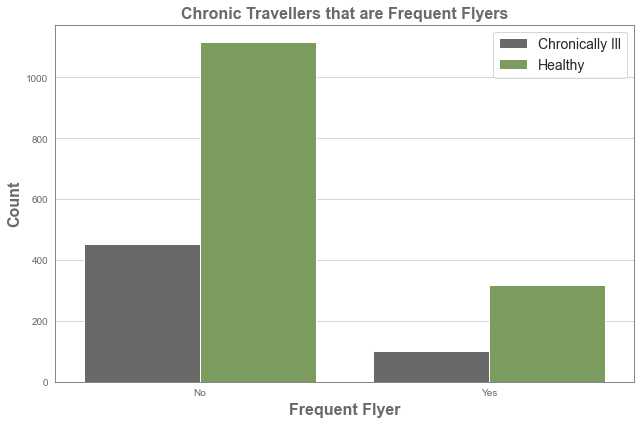

In [25]:
plot_std(tot_dat=users_data, typ='c', x_col='FrequentFlyer', hues='is_chronic',
            tit='Chronic Travellers that are Frequent Flyers', xlab='Frequent Flyer', ylab='Count')
plt.savefig('images/3.6.2.png')

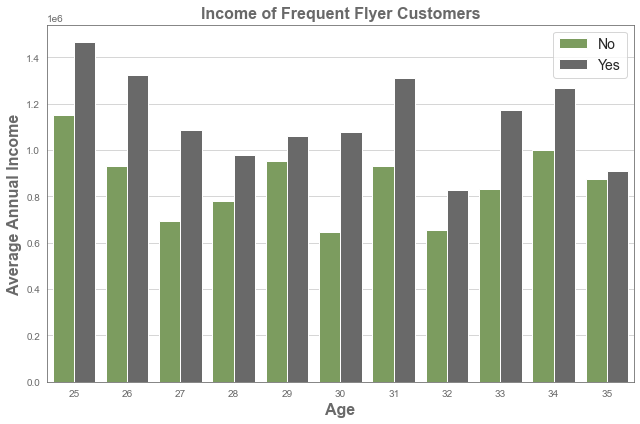

In [26]:
avg_ing = users_data.groupby(['Age','FrequentFlyer'])['AnnualIncome'].mean().reset_index()
plot_std(tot_dat=avg_ing, typ='b', x_col='Age', y_col='AnnualIncome', hues='FrequentFlyer',
            tit='Income of Frequent Flyer Customers', xlab='Age', ylab='Average Annual Income')
plt.savefig('images/3.6.3.png')

In [27]:
inc_cust_freq = avg_ing[avg_ing['FrequentFlyer']=='Yes']['AnnualIncome'].reset_index()
inc_notCust_freq = avg_ing[avg_ing['FrequentFlyer']=='No']['AnnualIncome'].reset_index()

ages = avg_ing['Age'].unique()
diff_inc = inc_cust_freq['AnnualIncome'].mean()-inc_notCust_freq['AnnualIncome'].mean()

print('The mean of Frequent Travellers Income is: '+str(inc_cust_freq['AnnualIncome'].mean()))
print('The mean of Not Frequent Travellers Income is: '+str(inc_notCust_freq['AnnualIncome'].mean()))

The mean of Frequent Travellers Income is: 1135841.0829757226
The mean of Not Frequent Travellers Income is: 859232.2344339057


### 3.7. Ever Travelled Abroad

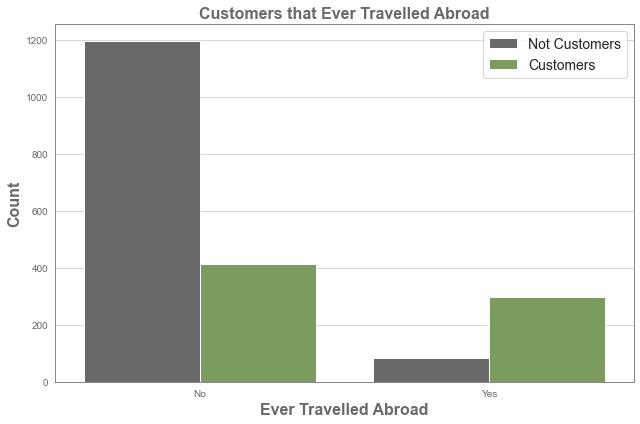

In [28]:
plot_std(tot_dat=users_data, typ='c', x_col='EverTravelledAbroad', hues='is_customer',
            tit='Customers that Ever Travelled Abroad', xlab='Ever Travelled Abroad', ylab='Count')
plt.savefig('images/3.7.1.png')

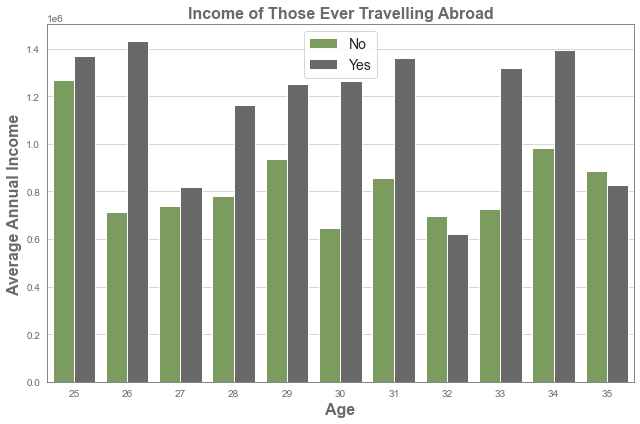

In [29]:
avg_ing = users_data.groupby(['Age','EverTravelledAbroad'])['AnnualIncome'].mean().reset_index()
plot_std(tot_dat=avg_ing, typ='b', x_col='Age', y_col='AnnualIncome', hues='EverTravelledAbroad',
            tit='Income of Those Ever Travelling Abroad', xlab='Age', ylab='Average Annual Income')
plt.savefig('images/3.7.2.png')

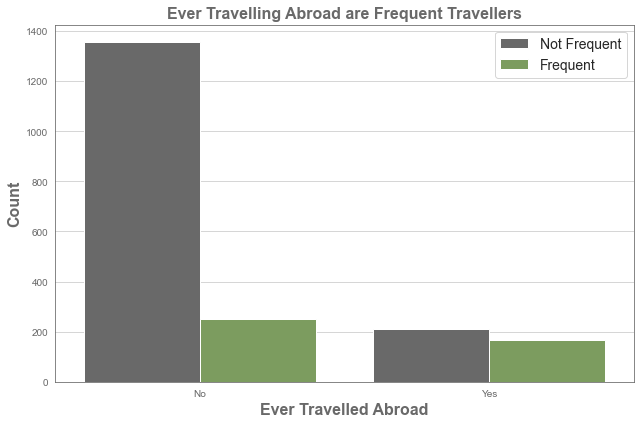

In [30]:
plot_std(tot_dat=users_data, typ='c', x_col='EverTravelledAbroad', hues='is_freq',
            tit='Ever Travelling Abroad are Frequent Travellers', xlab='Ever Travelled Abroad', ylab='Count')
plt.savefig('images/3.7.3.png')

In [31]:
inc_cust_abroad = avg_ing[avg_ing['EverTravelledAbroad']=='Yes']['AnnualIncome'].reset_index()
inc_notCust_abroad = avg_ing[avg_ing['EverTravelledAbroad']=='No']['AnnualIncome'].reset_index()

ages = avg_ing['Age'].unique()
diff_inc = inc_cust_abroad['AnnualIncome'].mean()-inc_notCust_abroad['AnnualIncome'].mean()

print('The mean of Ever Travelled Abroad Income is: '+str(inc_cust_abroad['AnnualIncome'].mean()))
print('The mean of Not Ever Travelled Abroad Income is: '+str(inc_notCust_abroad['AnnualIncome'].mean()))

The mean of Ever Travelled Abroad Income is: 1165423.0723396568
The mean of Not Ever Travelled Abroad Income is: 838936.6112859879
